In [1]:
# import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from unityagents import UnityEnvironment
import numpy as np

In [3]:
env = UnityEnvironment(file_name='./Reacher_Linux_NoVis/Reacher.x86_64')

Found path: /home/minhna4lab/minhna1112/study/RL/deep-reinforcement-learning/drl_continuous_control/./Reacher_Linux_NoVis/Reacher.x86_64
Mono path[0] = '/home/minhna4lab/minhna1112/study/RL/deep-reinforcement-learning/drl_continuous_control/./Reacher_Linux_NoVis/Reacher_Data/Managed'
Mono config path = '/home/minhna4lab/minhna1112/study/RL/deep-reinforcement-learning/drl_continuous_control/./Reacher_Linux_NoVis/Reacher_Data/MonoBleedingEdge/etc'
Preloaded 'libgrpc_csharp_ext.x64.so'
Unable to preload the following plugins:
	libgrpc_csharp_ext.x86.so
Logging to /home/minhna4lab/.config/unity3d/Unity Technologies/Unity Environment/Player.log


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [5]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [6]:
from agent.ddpg import DDPGAgent

agent = DDPGAgent(state_size=33, action_size=4, seed=0)


===================== Actor Network =========================
ActorNN(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=33, out_features=128, bias=True)
    (1): Linear(in_features=128, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=512, bias=True)
  )
  (bn_layers): ModuleList(
    (0): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (final_layer): Linear(in_features=512, out_features=4, bias=True)
)
===================== Critic Network =========================
CriticNN(
  (state_bn_layer): BatchNorm1d(33, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (state_linear_layer): Linear(in_features=33, out_features=33, bias=True)
  (hidden_layers): ModuleList(
    (0): Linear(in_features=37, out_features=128, bias=True

Episode 100	Average Score: 8.80	Score: 11.31
Episode 200	Average Score: 19.86	Score: 22.43
Episode 300	Average Score: 25.82	Score: 36.50
Episode 400	Average Score: 26.80	Score: 29.52
Episode 498	Average Score: 30.12	Score: 35.06


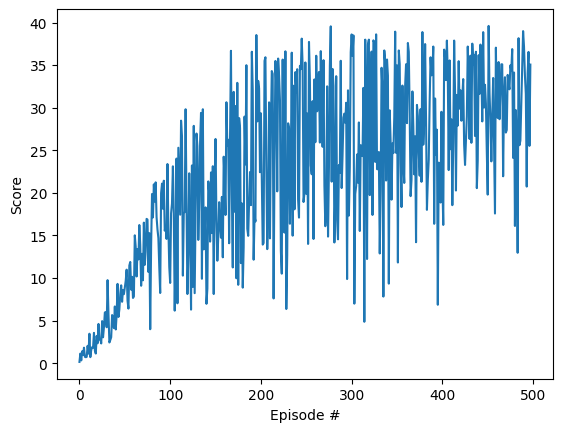

In [7]:
def ddpg(n_episodes=2000, max_t=10000):
    scores_deque = deque(maxlen=100)
    scores = []
    max_score = -np.Inf
    i_episode = 1
    for i_episode in range(1, n_episodes+1):
    #while True:
        # reset the environment
        env_info = env.reset(train_mode=True)[brain_name]    
        state = env_info.vector_observations                  # get the current state (for each agent)
        agent.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state)
            env_info = env.step(action)[brain_name]           # send all actions to tne environment
            next_state = env_info.vector_observations         # get next state (for each agent)
            reward = env_info.rewards[0]                         # get reward (for each agent)
            done = env_info.local_done[0]                        # see if episode finished
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_deque.append(score)
        scores.append(score)
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}'.format(i_episode, np.mean(scores_deque), score), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}'.format(i_episode, np.mean(scores_deque), score))
        if np.mean(scores_deque) >= 30.:
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            break
    return scores

scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
fig.savefig('solution/output.png')

In [7]:
env.close()

In [ ]:
fig.savefig('solution/output.png')